In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1

In [52]:
def RTable(img, threshold):
    Rtable = []

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, bin = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, np.ones((3,3)))
    bin = ~bin.astype(np.uint8)
    plt.imshow(bin, cmap='gray')
    plt.show()

    contours, hierarchy = cv2.findContours(bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    plt.imshow(cv2.drawContours(img, contours , -1, (255,0,0) ))
    plt.show()

    sobelx = cv2.Sobel(bin, cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(bin,cv2.CV_64F,0,1,ksize=5)
    sobelx = sobelx/np.amax(sobelx)
    sobely = sobely/np.amax(sobely)
    gradient = np.sqrt(sobelx**2 + sobely**2)
    gradient = gradient/np.amax(gradient)
    plt.imshow(sobelx.astype(np.float32))
    plt.show()
    plt.imshow(sobely.astype(np.float32))
    plt.show()
    plt.imshow(gradient.astype(np.float32))
    plt.show()
    alpha = np.arctan2(sobelx,sobely)
    plt.imshow(alpha.astype(np.float32))
    plt.show()



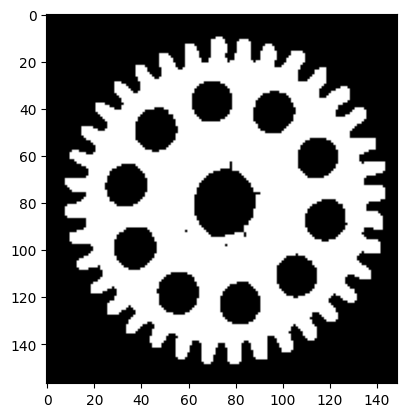

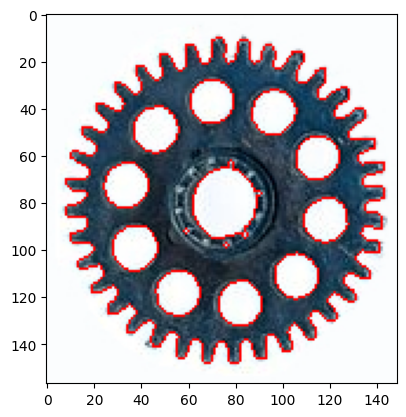

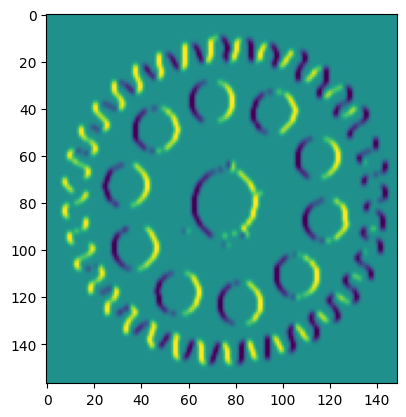

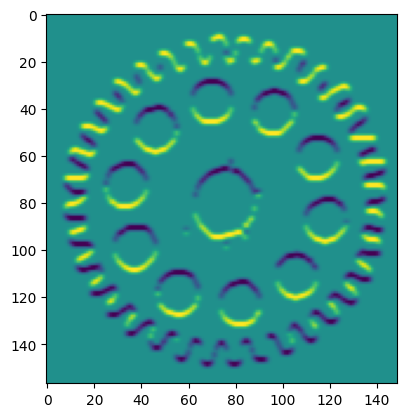

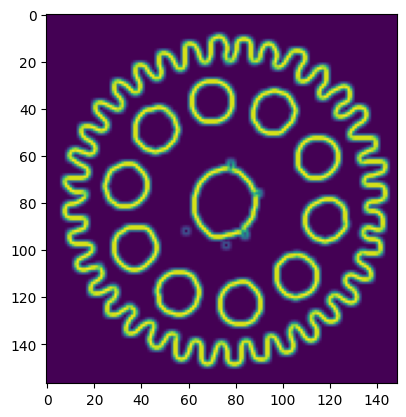

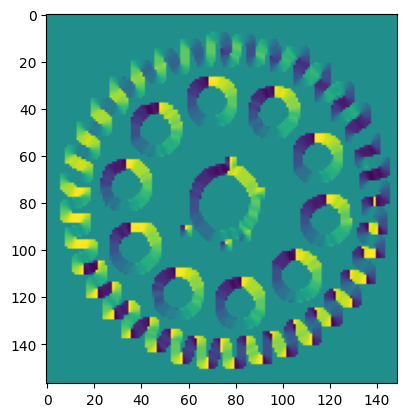

In [53]:
trybik = cv2.imread('trybik.jpg')
RTable(trybik, 225)